# Análise de Sobrevivência

por **Cibele Russo**

- Caracterização dos dados; 
- Estimação não paramétrica;
- Funções de sobrevivências usuais; 
- Modelos de regressão em análise de sobrevivência


Baseado em 

- https://www.ime.usp.br/~lane/home/MCM5916/surv.pdf

- Colosimo, E. A. ; Giolo, S. R. Análise de Sobrevivência Aplicada. Blucher, 2006.

- Louzada-Neto, F. ; Mazucheli, J. ; Achcar, J.A. . Análise de Sobrevivência e Confiabilidade. Lima, Peru: Instituto de Matematicas y Ciencias Afines, IMCA, 2002.

- [Lee, E. T., & Wang, J. (2003). Statistical methods for survival data analysis (Vol. 476). John Wiley & Sons.](https://onlinelibrary.wiley.com/doi/pdf/10.1002/0471458546)

- [Moore, D. F. (2016). Applied survival analysis using R. New York, NY: Springer.](https://link.springer.com/content/pdf/10.1007%2F978-3-319-31245-3.pdf)


Implementações:

- https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html





## Objetivos

- Estudar o tempo desde um instante inicial até a ocorrência de um evento (falha)


**Exemplo:**

- Estudar o tempo de sobrevida de um paciente a partir de um instante inicial após o primeiro AVC.


O que queremos saber?


**Probabilidade de Sobrevida**

$P(T > 100)$ = prob. de viver mais que 100 dias


**Taxa de falha**

Sem censura, a **taxa de falha** em um intervalo representa quantos falharam com relação a quantos estavam suscetíveis com relação à duração do intervalo.



## Censura

Poderia propor modelos como os de regressão e análise de variância para a variável resposta Tempo de vida

Mas se observei que um paciente viveu mais que 800 dias e não sei quando morreu, tenho que inclui-lo na análise! 

O estudo terminou e não se observou a falha. A censura pode acontecer por diversos motivos:

- Perda de seguimento (follow up)

- Estudo acabou e o evento não foi observado

    - Paciente saiu do estudo (drop out)

- A pessoa sai do estudo por ocorrência de outro evento. 

    - Ex: efeito colateral, transplante, óbito quando não for o evento de interesse
        
### Tipos de censura

- **Censura à direita**, a mais comum: 

    - Tempo de sobrevida maior que o tempo observado $T \geq O$.
        
- **Censura à esquerda:**: 

    - Follow up até pessoas serem contaminadas por coronavírus $T \leq O$ 

    - Fez teste em $t$ e deu positivo então sei que $T<t$.

- **Censura intervalar:** Só sei que $t_1 \leq T \leq t_2$: Fiz testes nos instantes t1 e t2


### Formas de descrever a censura

- **Aleatória**: Tempo de falha $(T)$ e de censura $(C)$ aleatórios e observamos $t=min(T,C)$.

- **Censura tipo I**: Estudo acaba após certo tempo e temos $r$ falhas e no final do estudo temos $n-r$ censuras.

- **Censura tipo II**: $r$ é fixado e só os menores $r$ tempos são observados e todos os outros tempos são censurados. O maior tempo observado é t(r).

- **Independente**: ocorrência dessa censura é independente do mecanismo que provoca a morte. E se a pessoa com melhor prognóstico sempre larga o estudo?

### Implementação em Python: Pacote lifelines

Exemplo adaptado de https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html

Considere uma amostra composta por dois tipos de cliente de um produto, A e B. O tipo A cancela o produto muito rapidamente, digamos em 2 meses em média, e o tipo B permanece por um tempo muito maior, digamos 12 meses em média. Não sabemos essa distinção de antemão. Em $t = 10$, desejamos investigar a expectativa de permanência média para todos os clientes com base nessa amostra.



In [1]:
import lifelines
import matplotlib.pyplot as plt

from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

import random
random.seed(1)


In [2]:
# número de observações que serão geradas
N = 25

# tempo final do estudo
CURRENT_TIME = 10

# gera amostra
actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

actual_lifetimes

array([ 3.11024421, 30.0636079 ,  3.15599653, 19.8660883 ,  2.32242182,
        0.2012072 , 11.47642973,  0.04527968, 21.29764111,  5.22625282,
        3.27476079, 12.37002634,  4.08916454,  6.90359754,  0.32123824,
       28.90139633,  4.07254504, 10.61032857,  1.65283713,  0.85423643,
        0.15731957,  2.7520029 ,  2.02330571,  7.2225585 ,  4.88074938])

In [3]:
observed_lifetimes

array([ 3.11024421, 10.        ,  3.15599653, 10.        ,  2.32242182,
        0.2012072 , 10.        ,  0.04527968, 10.        ,  5.22625282,
        3.27476079, 10.        ,  4.08916454,  6.90359754,  0.32123824,
       10.        ,  4.07254504, 10.        ,  1.65283713,  0.85423643,
        0.15731957,  2.7520029 ,  2.02330571,  7.2225585 ,  4.88074938])

In [4]:
observed_lifetimes[0:25]

array([ 3.11024421, 10.        ,  3.15599653, 10.        ,  2.32242182,
        0.2012072 , 10.        ,  0.04527968, 10.        ,  5.22625282,
        3.27476079, 10.        ,  4.08916454,  6.90359754,  0.32123824,
       10.        ,  4.07254504, 10.        ,  1.65283713,  0.85423643,
        0.15731957,  2.7520029 ,  2.02330571,  7.2225585 ,  4.88074938])

Tempo de permanência 10:
 [ 3.11024421 10.          3.15599653 10.          2.32242182  0.2012072
 10.          0.04527968 10.          5.22625282  3.27476079 10.
  4.08916454  6.90359754  0.32123824 10.          4.07254504 10.
  1.65283713  0.85423643  0.15731957  2.7520029   2.02330571  7.2225585
  4.88074938]


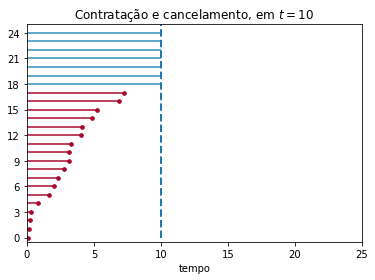

In [5]:
ax = plot_lifetimes(observed_lifetimes[0:25], event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("tempo")
ax.set_title("Contratação e cancelamento, em $t=10$")
print("Tempo de permanência %d:\n" % (CURRENT_TIME), observed_lifetimes)

Na figura acima, as linhas vermelhas denotam o tempo de permanência dos indivíduos onde o evento de cancelamento do produto foi observada, e as linhas azuis indicam o tempo de permanência dos indivíduos censurados à direita (cancelamentos não foram observadas). Se queremos a estimar a média de vida de nossa população e ingenuamente decidirmos não incluir os indivíduos censurados à direita, é claro que estaríamos subestimando severamente a verdadeira média de vida.

Além disso, se, em vez disso, simplesmente pegássemos a média de todas as expectativas de permanência (vida), incluindo as atuais de instâncias censuradas à direita, ainda estaríamos subestimando a verdadeira média de permanência. Abaixo, plotamos as vidas úteis reais de todas as instâncias (lembre-se de que não vemos essa informação em $t = 10$).

(0.0, 32.0)

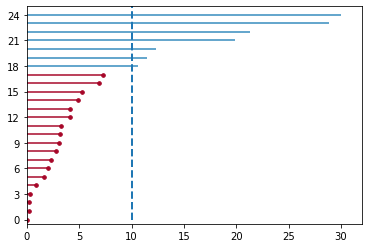

In [6]:
ax = lifelines.plotting.plot_lifetimes(durations=actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 32)

In [7]:
len(actual_lifetimes)

25

## Função de sobrevivência

https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html#survival-function

https://en.wikipedia.org/wiki/Survival_function

    

### Função de sobrevivência

Seja $T$ um tempo de vida aleatório (possivelmente infinito, mas sempre não negativo) retirado da população em estudo. Por exemplo, quanto tempo um casal está casado. Ou o tempo que um usuário leva para entrar em uma página da Web (um tempo infinito, se isso nunca acontecer). A função de sobrevivência de uma população é definida como

$$S(t) = P(T>t)$$

A função de sobrevivência define a probabilidade de o evento de morte ainda não ter ocorrido no tempo t, ou equivalentemente, a probabilidade de sobreviver no tempo passado t.

#### Propriedades

1. $0\leq S(t) \leq 1$

2. $F_T(t)  = 1-S(t)$, em que $F_T(t) $ é a função distribuição acumulada de T, o que implica que

3. $S(t)$ é uma função não-crescente de $t$.


**Exemplo**




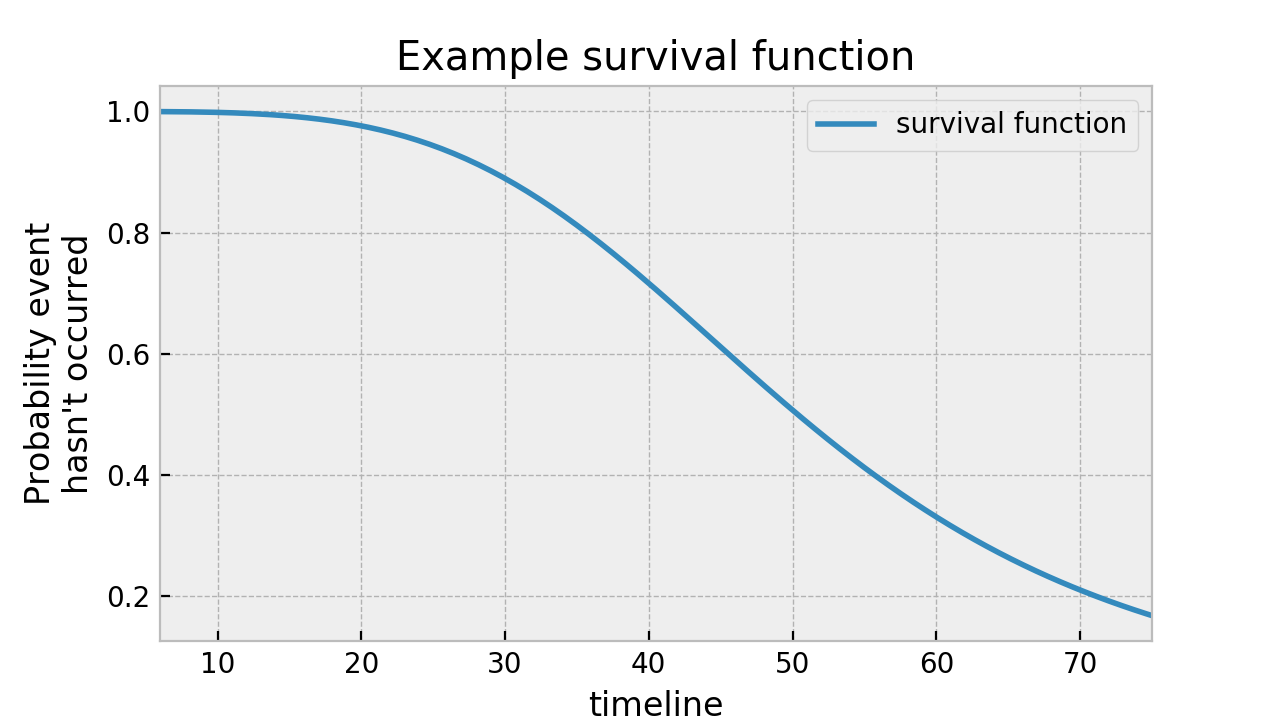

### Função de risco

Também estamos interessados na probabilidade do evento de morte ocorrer no tempo $t$, visto que o evento de óbito ainda não ocorreu. 

Matematicamente, essa probabilidade é dada por

$$\lim_{\delta t \to 0} P(t\leq T \leq t+\delta t|T>t)$$

Essa quantidade vai para $0$ quando $\delta t$ diminui, então dividimos isso pelo intervalo $\delta t$ . Isso define a função de risco no tempo $t$, $h(t)$

$$h(t) = \lim_{\delta t \to 0} \displaystyle \frac{P(t\leq T \leq t+\delta t|T>t)}{\delta t}$$

Pode-se mostrar que isso é igual a:
$$h(t) =   \displaystyle \frac{-S'(t)}{S(t)}$$

e resolvendo essa equação diferencial, temos

$$S(t) = \exp \left(- \int_{0}^{1}h(z) dz \right)$$


A integral é chamada **função de risco cumulativo**, denotada $H(t)$, que pode ser reescrita como

$$S (t) = \exp(- H (t))$$


Com isso, as duas figuras abaixo representam o risco e o risco cumulativo, respectivamente, da função de sobrevivência na figura acima.



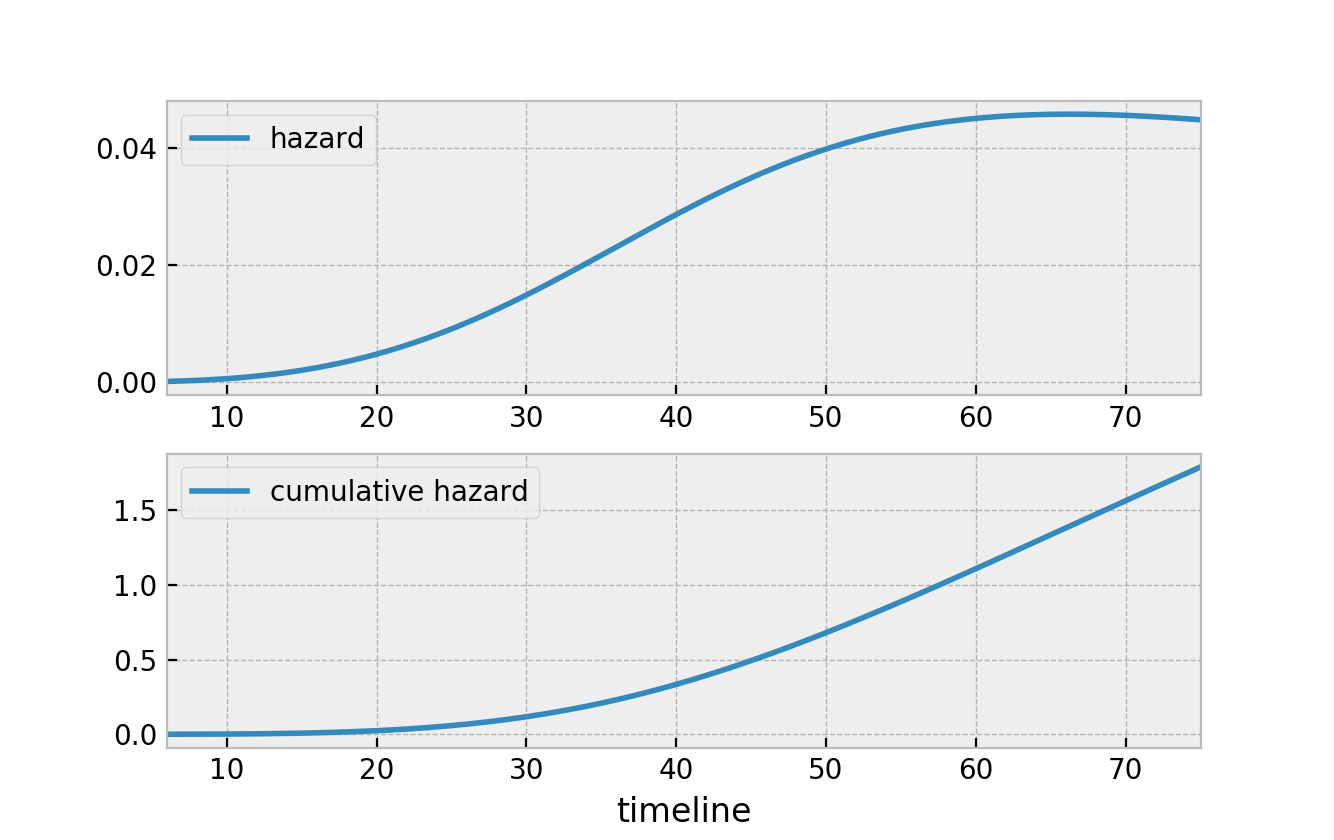

## Estimador de Kaplan-Meier

https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator



**Propriedades do estimador de Kaplan-Meier**

- Não viciado para amostras grandes

- Permite comparar curvas, mas não permite a inclusão de covariáveis

- É consistente

- Converge assintoticamente para um processo gaussiano

- É o estimador de máxima verossimilhança de S(t)



## Aplicação 

Vamos considerar os dados Waltons disponíveis no pacote lifelines. Precisamos das durações pelas quais os indivíduos são observados e se eles 'morreram' ou não.<br>

T = Tempo de Sobrevida<br>
E = Evento Ocorre ou Não<br>
group = Genótipo<br>

In [8]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

print(df.head(10))


T = df['T']
E = df['E']

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137
5  19.0  1  miR-137
6  19.0  1  miR-137
7  26.0  1  miR-137
8  26.0  1  miR-137
9  26.0  1  miR-137


In [9]:
df.tail(20)


,T,E,group
143,45.0,1,control
144,45.0,0,control
145,45.0,1,control
146,53.0,1,control
147,53.0,1,control
148,53.0,1,control
149,53.0,1,control
150,53.0,1,control
151,60.0,1,control
152,60.0,0,control


<AxesSubplot:xlabel='timeline'>

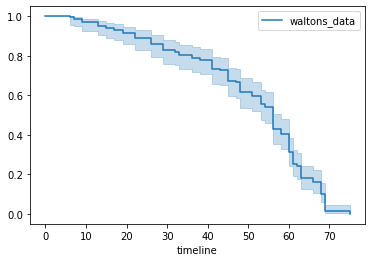

In [10]:
# Fonte https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html
# Fonte dos dados: https://lifelines.readthedocs.io/en/latest/lifelines.datasets.html#lifelines.datasets.load_waltons

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
waltons = load_waltons()

kmf = KaplanMeierFitter(label="waltons_data")
kmf.fit(waltons['T'], waltons['E'])
kmf.plot()



## Múltiplos grupos


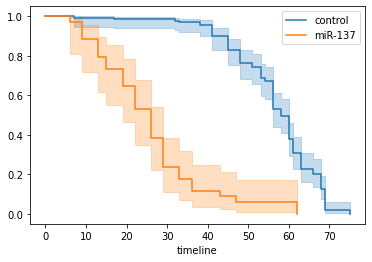

In [11]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot(ax=ax)

## Modelos paramétricos

O pacote lifelines possui modelos paramétricos integrados. 

Por exemplo: Weibull, Log-Normal, Log-Logistic e outros.

<AxesSubplot:>

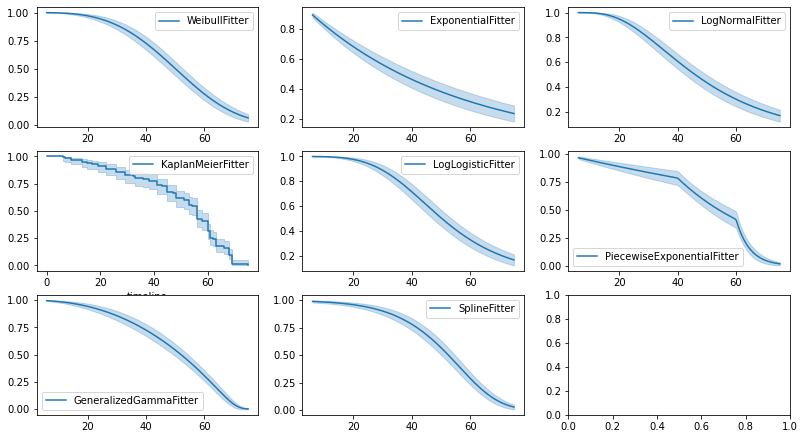

In [12]:
# Fonte: https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html#other-parametric-models-exponential-log-logistic-log-normal-and-splines
# Algumas referências adicionais:
#

import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

fig, axes = plt.subplots(3, 3, figsize=(13.5, 7.5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
sf = SplineFitter(np.percentile(T.loc[E.astype(bool)], [0, 50, 100])).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])
sf.plot_survival_function(ax=axes[2][1])

## Modelo de Cox

Leitura adicional: https://en.wikipedia.org/wiki/Proportional_hazards_model#The_Cox_model

- Modelo de riscos proporcionais

- Podem ser incluídas covariáveis

O risco no tempo t com variável explicativa X é

$$h(t|X) = h_0(t) \exp(\beta X)$$

Exemplo para X=1 se fuma e 0 se não fuma


$$h(t|X) = \left\{\begin{array}{c} h_0(t), \mbox{ para } X=0\\
 h_0(t)\exp(\beta ), \mbox{ para } X=1\\
\end{array}\right. $$


Os riscos são proporcionais e a razão entre os riscos é

$$\displaystyle  \frac{h(t|1)}{h(t|0)} = \exp(\beta)$$

Interpretação?

Para $p$ variáveis explicativas


$$h(t) = h_0(t) \exp(\sum_{i=1}^{p}\beta_i X_i)$$

In [13]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset() # a Pandas DataFrame
import pandas as pd
import numpy as np

from lifelines import CoxPHFitter

regression_dataset

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1
...,...,...,...,...,...
195,0.137399,0.107748,0.354812,11.445457,1
196,0.637341,2.847188,1.459137,7.624627,1
197,1.109732,0.405561,0.018856,10.634620,1
198,0.031865,1.753759,0.252040,8.519718,1


<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 189
   partial log-likelihood = -807.62
         time fit was run = 2021-09-07 18:33:01 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
var1        0.22       1.25       0.07             0.08             0.37                 1.08                 1.44
var2        0.05       1.05       0.08            -0.11             0.21                 0.89                 1.24
var3        0.22       1.24       0.08             0.07             0.37                 1.07                 1.44

             z      p   -log2(p)
covariate                       
var1      2.99 <0.005       8.49
var2      0.61   0.54       0.89
var3      2.88 <0.005       7.97
---
Concordance = 0.58
Partial AIC = 1621.24
log-likelihood ratio test = 15.54 on 3 df
-log2(p) of ll-ratio test = 9.47

<AxesSubplot:xlabel='log(HR) (95% CI)'>

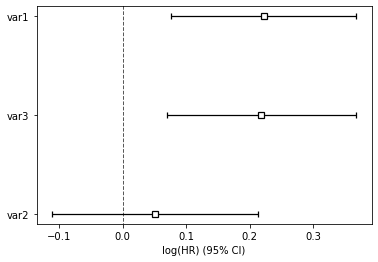

In [14]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()


cph.plot()

O mesmo conjunto de dados, mas com um modelo de tempo de falha acelerado de Weibull. 

Este modelo tinha dois parâmetros, e podemos escolher modelar ambos usando nossas covariáveis ou apenas uma. 

Abaixo, modelamos apenas o parâmetro de escala, lambda.

<lifelines.WeibullAFTFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
   number of observations = 200
number of events observed = 189
           log-likelihood = -504.48
         time fit was run = 2021-09-07 18:33:42 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ var1       -0.08       0.92       0.02            -0.13            -0.04                 0.88                 0.97
        var2       -0.02       0.98       0.03            -0.07             0.04                 0.93                 1.04
        var3       -0.08       0.92       0.02            -0.13            -0.03                 0.88                 0.97
        Intercept   2.53      12.57       0.05             2.43             2.63                11.41                13.85
rho_    Intercept   1.09       2.98       0.05             0.99             1.20                 2.68                 3.32

                      z      p   -log2(p)
param   covariate                        
lambda_ var1      -3.45 <0.005      10.78
        var2      -0.56   0.57       0.80
        var3      -3.33 <0.005      10.15
        Intercept 51.12 <0.005        inf
rho_    Intercept 20.12 <0.005     296.66
---
Concordance = 0.58
AIC = 1018.97
log-likelihood ratio test = 19.73 on 3 df
-log2(p) of ll-ratio test = 12.34

<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

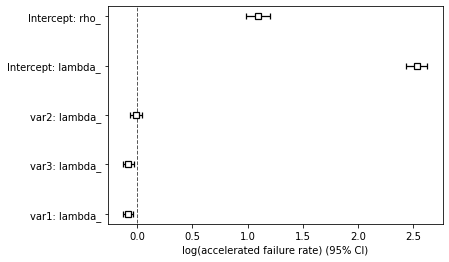

In [15]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(regression_dataset, 'T', event_col='E')
wft.print_summary()

wft.plot()

Um modelo de regressão alternativo é o modelo aditivo de Aalen, que tem riscos que variam com o tempo:

In [16]:
# Using Aalen's Additive model
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')

<lifelines.AalenAdditiveFitter: fitted with 200 total observations, 11 right-censored observations>

Junto com CoxPHFitter e WeibullAFTFitter, após o ajuste, você terá acesso a propriedades como resumo e métodos como plot, predict_cumulative_hazards e predict_survival_function. 

Os dois últimos métodos requerem um argumento adicional de covariáveis:

<AxesSubplot:>

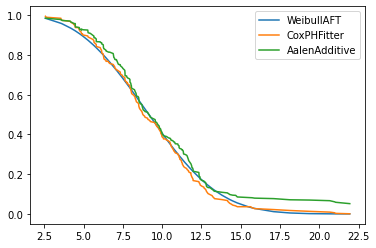

In [17]:
X = regression_dataset.loc[0]

ax = wft.predict_survival_function(X).rename(columns={0:'WeibullAFT'}).plot()
cph.predict_survival_function(X).rename(columns={0:'CoxPHFitter'}).plot(ax=ax)
aaf.predict_survival_function(X).rename(columns={0:'AalenAdditive'}).plot(ax=ax)



### Modelos de longa duração ou de fração de cura

Leitura recomendada: 

- Granzotto, D. C. T. (2008). Seleção de modelos de tempos com longa-duração para dados de finanças. Dissertação de mestrado. UFSCar. Disponível em https://repositorio.ufscar.br/bitstream/handle/ufscar/4532/2168.pdf?sequence=1 Acessado em 28/08/2020.

- https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Modelling%20time-lagged%20conversion%20rates.html



Suponha que em nossa população tenhamos uma subpopulação que nunca experimentará o evento de interesse. Ou, para alguns assuntos, o evento ocorrerá tão longe no futuro que é essencialmente no tempo infinito. A função de sobrevivência não deve se aproximar assinticamente de zero, mas de algum valor positivo. 

Os modelos que descrevem isso às vezes são chamados de modelos de fração cura (ou seja, o sujeito está "curado" da morte e, portanto, não é mais suscetível) ou modelos de conversão defasados no tempo.

Há uma falha séria em usar modelos paramétricos para esses tipos de problemas que os modelos não paramétricos não têm. Os modelos paramétricos mais comuns, como Weibull, Log-Normal, etc., todos têm funções de risco cumulativas estritamente crescentes, o que significa que a função de sobrevivência correspondente sempre convergirá para 0.

Vejamos um exemplo desse problema. 

A seguir alguns dados que possuem indivíduos que não vivenciarão o evento, não importa o quanto esperemos. argumento adicional de covariáveis:

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import autograd.numpy as np
from autograd.scipy.special import expit, logit
import pandas as pd
plt.style.use('bmh')


Text(0.5, 1.0, 'Survival function estimated by KaplanMeier')

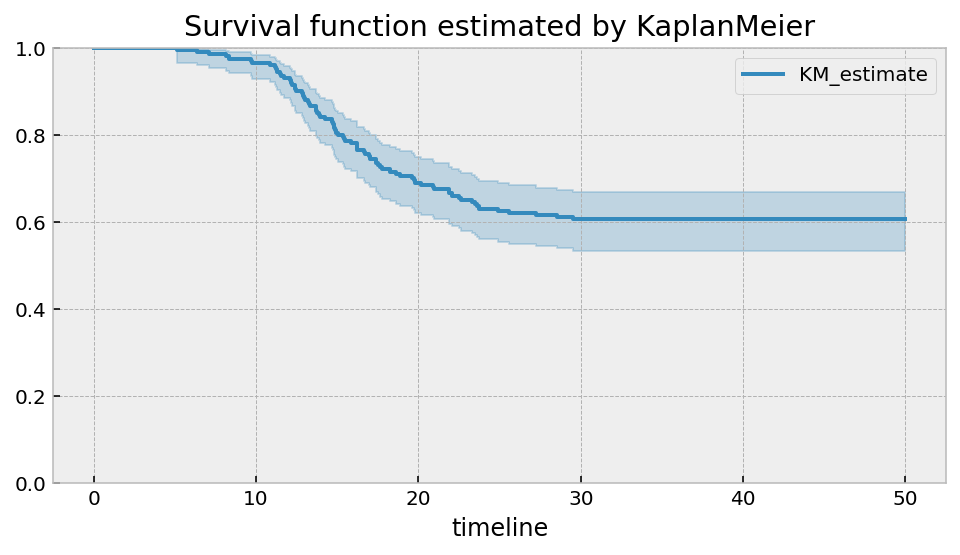

In [19]:

N = 200
U = np.random.rand(N)
T = -(logit(-np.log(U) / 0.5) - np.random.exponential(2, N) - 6.00) / 0.50

E = ~np.isnan(T)
T[np.isnan(T)] = 50

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E)
kmf.plot(figsize=(8,4))
plt.ylim(0, 1);
plt.title("Survival function estimated by KaplanMeier")



Deve ficar claro que existe uma assíntota em torno de 0,6. O modelo não paramétrico sempre mostrará isso. Se isso for verdade, a função de risco cumulativo também deve ter uma assíntota horizontal. Vamos usar o modelo Nelson-Aalen para ver isso.

Text(0.5, 1.0, 'Cumulative hazard estimated by NelsonAalen')

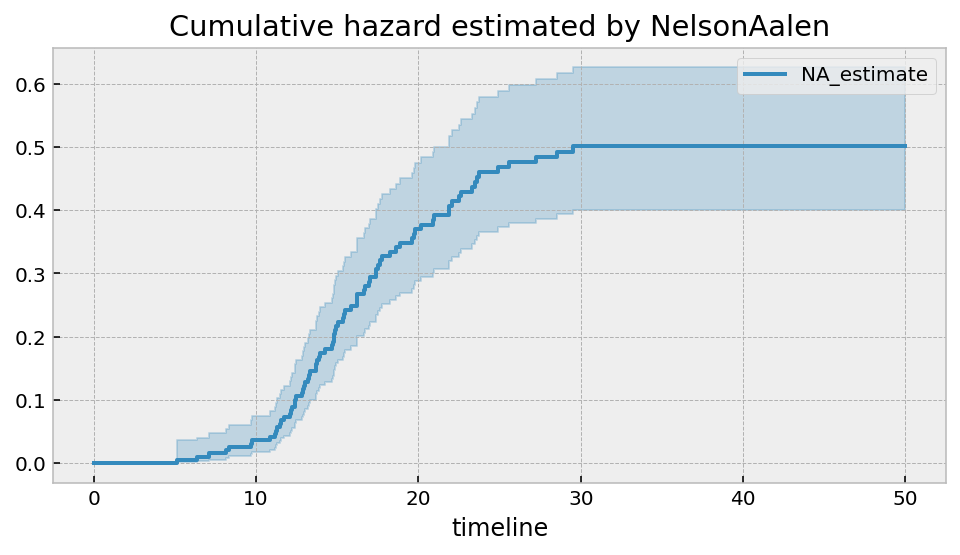

In [20]:
from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter().fit(T, E)
naf.plot(figsize=(8,4))
plt.title("Cumulative hazard estimated by NelsonAalen")

No entanto, quando tentamos um modelo paramétrico, veremos que ele não extrapola muito bem. Vamos usar o modelo flexível de dois parâmetros LogLogisticFitter.

<AxesSubplot:xlabel='timeline'>

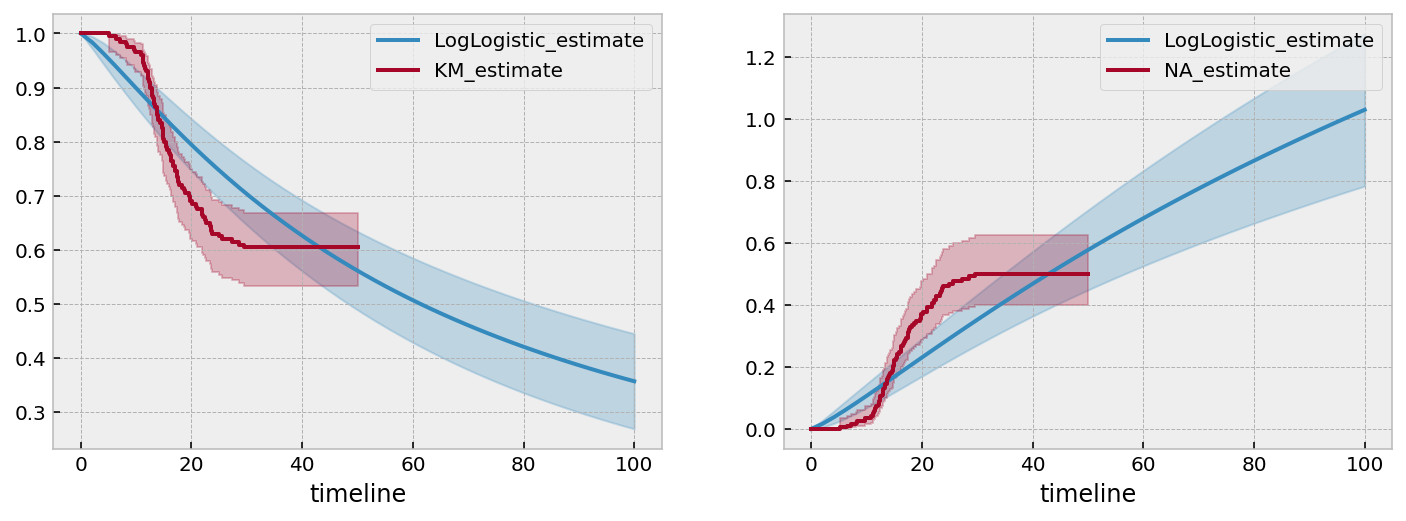

In [21]:
from lifelines import LogLogisticFitter

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

t = np.linspace(0, 40)
llf = LogLogisticFitter().fit(T, E, timeline=t)

t = np.linspace(0, 100)
llf = LogLogisticFitter().fit(T, E, timeline=t)

llf.plot_survival_function(ax=ax[0])
kmf.plot(ax=ax[0])

llf.plot_cumulative_hazard(ax=ax[1])
naf.plot(ax=ax[1])



**Ver outros modelos em**

https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Modelling%20time-lagged%20conversion%20rates.html